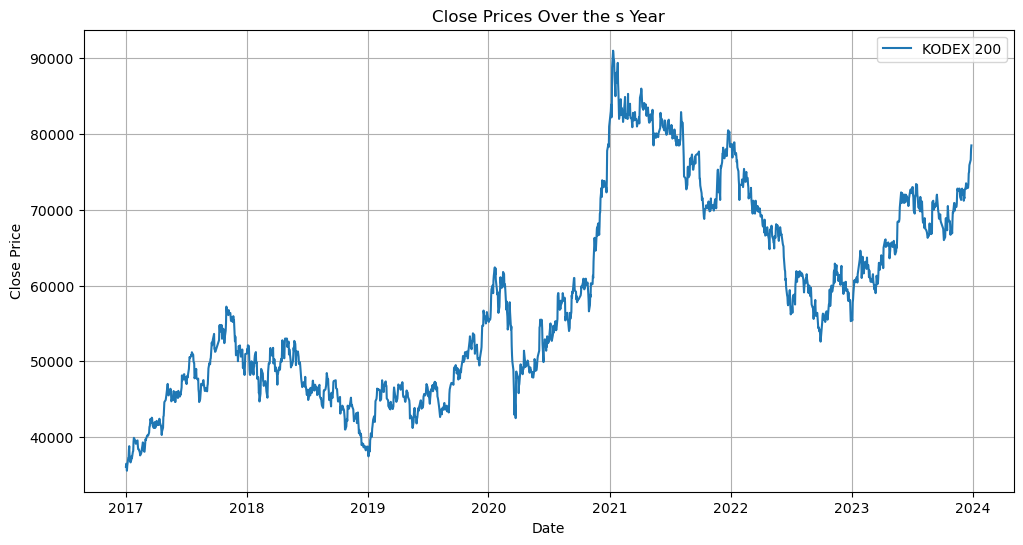

In [15]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

start_date = '2017-01-01'
end_date = '2024-01-01'

kodex200 = fdr.DataReader('005930', start=start_date, end=end_date)

etf_df = pd.DataFrame()

etf_df['KODEX_200'] = kodex200['Close']

plt.figure(figsize=(12, 6))
plt.plot(etf_df.index, etf_df['KODEX_200'], label='KODEX 200')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices Over the s Year')
plt.legend()
plt.grid(True)
plt.show()

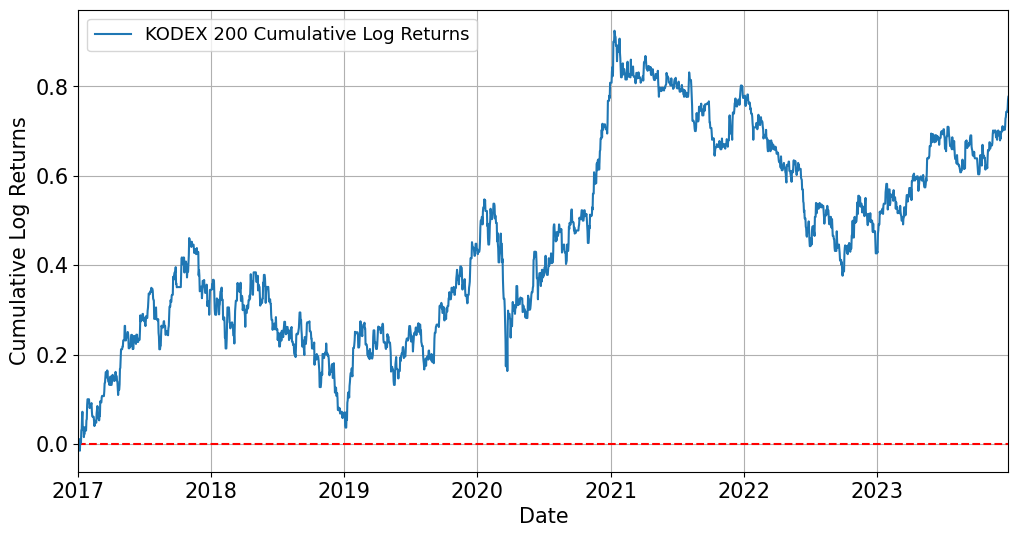

In [16]:
import matplotlib.dates as mdates
daily = etf_df.resample('d').last() #일별 수익률
#weekly = etf_df.resample('w').last() #주별 수익률
#monthly = etf_df.resample('m').last() #월별 수익률
d_df = daily.pct_change()


daily_log_returns = d_df.apply(lambda x: np.log(1 + x)).cumsum() # 누적수익률

plt.figure(figsize=(12, 6))
plt.axhline(y=0.0, color='red', linestyle='--')
plt.plot(daily_log_returns.index, daily_log_returns['KODEX_200'], label='KODEX 200 Cumulative Log Returns')
plt.xlim(daily_log_returns.index[0], daily_log_returns.index[-1])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative Log Returns', fontsize=15)
plt.legend(fontsize=13)
plt.grid(True)


ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

current_xticks = ax.get_xticks()
current_xticks_dates = mdates.num2date(current_xticks)

new_xticks_dates = [pd.Timestamp('2017-01-01')] + [d.replace(tzinfo=None) for d in current_xticks_dates]
new_xticks_dates = np.unique(new_xticks_dates)


new_xticks = mdates.date2num(new_xticks_dates)
ax.set_xticks(new_xticks)
ax.set_xticklabels([date.strftime('%Y') for date in new_xticks_dates], fontsize=15)

plt.show()